In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572

In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(1)

In [7]:
y_test[:,:,].shape

(1, 572, 572, 2)

In [15]:
generator.n_class

2

In [14]:
y_test.sum(axis=3).min()

1.0

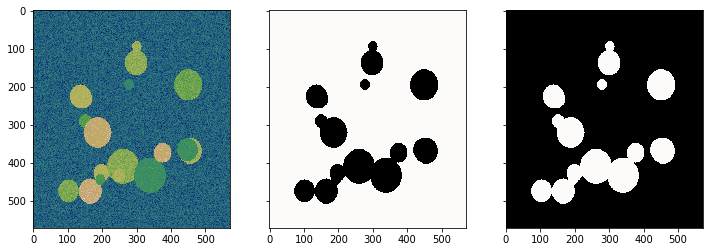

In [9]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
# ax[1].imshow(y_test[0,...,0], aspect="auto")
ax[2].imshow(y_test[0,...,1], aspect="auto")

In [25]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2018-08-26 18:46:06,789 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [26]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [27]:
path = trainer.train(generator, "./unet_trained", training_iters=6, epochs=4, display_step=2)

2018-08-26 18:46:09,110 Removing '/home/tomas/tf_unet/demo/prediction'
2018-08-26 18:46:09,111 Removing '/home/tomas/tf_unet/demo/unet_trained'
2018-08-26 18:46:09,112 Allocating '/home/tomas/tf_unet/demo/prediction'
2018-08-26 18:46:09,114 Allocating '/home/tomas/tf_unet/demo/unet_trained'
2018-08-26 18:46:14,920 Verification error= 16.4%, loss= 0.6554
2018-08-26 18:46:15,466 Start optimization
2018-08-26 18:46:20,000 Iter 0, Minibatch Loss= 0.6014, Training Accuracy= 0.8080, Minibatch error= 19.2%
2018-08-26 18:46:26,352 Iter 2, Minibatch Loss= 0.4690, Training Accuracy= 0.8856, Minibatch error= 11.4%
2018-08-26 18:46:32,645 Iter 4, Minibatch Loss= 0.4901, Training Accuracy= 0.8146, Minibatch error= 18.5%
2018-08-26 18:46:35,698 Epoch 0, Average loss: 0.5490, learning rate: 0.2000
2018-08-26 18:46:40,550 Verification error= 16.4%, loss= 0.4505
2018-08-26 18:46:45,225 Iter 6, Minibatch Loss= 0.4037, Training Accuracy= 0.8623, Minibatch error= 13.8%
2018-08-26 18:46:51,550 Iter 8, Mini

In [30]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2018-08-26 18:51:59,371 Restoring parameters from ./unet_trained/model.ckpt
2018-08-26 18:51:59,439 Model restored from file: ./unet_trained/model.ckpt


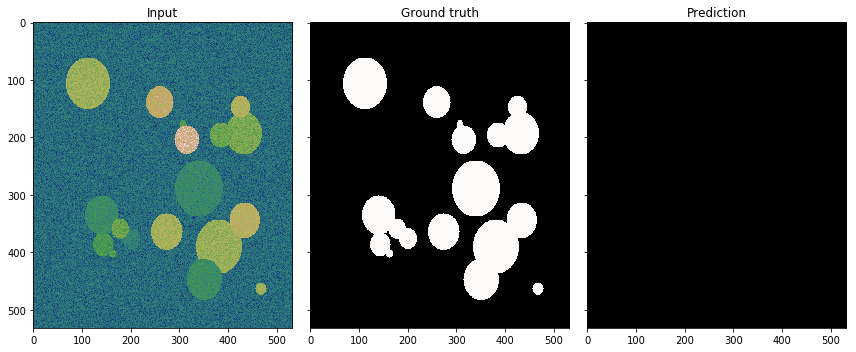

In [31]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")